In [1]:
import matplotlib.pyplot as plt
import numpy as np
import h5py
from scipy.stats import gaussian_kde
import glob

In [2]:
period = 5
dealias = 2 / 3
eta = 0.01172
folder = 'data/ns3d.strat_256x256x64_V3x3x0.75_N500_1.0/'

In [3]:
file_path = glob.glob(folder + 'spectra1d.h5')[-1]

diss_length = dealias * np.pi / (2 * eta)

with h5py.File(file_path, 'r') as hdf_file:
    kx = dealias * hdf_file['kx'][:]
    ky = dealias * hdf_file['ky'][:]
    kz = dealias * hdf_file['kz'][:]
    spectra_E_kx = hdf_file['spectra_E_kx'][:]
    spectra_E_ky = hdf_file['spectra_E_ky'][:]
    spectra_E_kz = hdf_file['spectra_E_kz'][:]
    times = hdf_file['times'][:]
    
filtered_spectra_E_kx = spectra_E_kx[times > period]
filtered_spectra_E_ky = spectra_E_ky[times > period]
filtered_spectra_E_kz = spectra_E_kz[times > period]

spectra_E_kx_mean = np.mean(filtered_spectra_E_kx, axis=0)
spectra_E_ky_mean = np.mean(filtered_spectra_E_ky, axis=0)
spectra_E_kz_mean = np.mean(filtered_spectra_E_kz, axis=0)

k53 = False

if k53:
    power = 5/3
else:
    power = 0
    
plt.figure(figsize=(6, 3))

plt.loglog(kx[1:], np.sqrt(spectra_E_kx_mean[1:]**2 + spectra_E_ky_mean[1:]**2) * kx[1:]**(power), 'k-', label='$E(k_h)$')

#plt.loglog(ky[1:], spectra_E_ky_mean[1:] * ky[1:]**(power), 'k--', label='$E(k_y)$')

plt.loglog(kx[1:], 10**-0.5 * kx[1:]**(-5/3), 'r--', label='$k^{-5/3}$')


plt.xlabel('$k_h$')
plt.ylabel('$E(k)$')

plt.ylim(bottom=10**-5)

plt.legend()
#lt.savefig('1d_spectra.png', dpi=300)

plt.show()

plt.figure(figsize=(6, 3))

plt.loglog(kz[1:], spectra_E_kz_mean[1:] * kz[1:]**(power), 'k-', label='$E(k_z)$')

#plt.loglog(ky[1:], spectra_E_ky_mean[1:] * ky[1:]**(power), 'k--', label='$E(k_y)$')

plt.loglog(kz[1:], 10**-0.5 * kz[1:]**(-5/3), 'r--', label='$k^{-5/3}$')


plt.xlabel('$k_z$')
plt.ylabel('$E(k)$')

plt.ylim(bottom=10**-5)

plt.legend()
#lt.savefig('1d_spectra.png', dpi=300)

plt.show()


IndexError: list index out of range

In [4]:
file_path = glob.glob(folder + 'spectra3d.h5')[-1]
print(file_path)
period = 5

with h5py.File(file_path, 'r') as hdf_file:
    k_spectra3d = dealias * hdf_file['k_spectra3d'][:]
    spectra_E = hdf_file['spectra_E'][:]
    spectra_u = hdf_file['spectra_vx'][:]
    spectra_v = hdf_file['spectra_vy'][:]
    spectra_w = hdf_file['spectra_vz'][:]
    times = hdf_file['times'][:]

spectra_E_mean = np.mean(spectra_E, axis=1)
spectra_u_mean = np.mean(spectra_u, axis=1)
spectra_v_mean = np.mean(spectra_v, axis=1)
spectra_w_mean = np.mean(spectra_w, axis=1)


plt.figure(figsize=(6, 3))
plt.semilogy(times, spectra_E_mean, 'k-', label='$E_{tot}$')
plt.semilogy(times, spectra_u_mean, 'k--', label='$E_x$')
plt.semilogy(times, spectra_v_mean, 'k-.', label='$E_y$')
plt.semilogy(times, spectra_w_mean, 'k:', label='$E_z$')

plt.xlabel('time')
plt.ylabel('Energy')

plt.legend()

#plt.savefig('3d_spectra_time.png', dpi=300)

plt.show()

filtered_E = spectra_E[times > period]

spectra_E_mean = np.mean(filtered_E, axis=0)

plt.figure(figsize=(5, 3))
plt.loglog(k_spectra3d, spectra_E_mean, 'b-')

plt.xlabel('$k_z$')
plt.ylabel('$E(k_z)$')

plt.ylim(bottom=10**-9)

#plt.savefig('3d_spectrum.png', dpi=300)
print("Plot saved as '3d_spectrum.png'")


IndexError: list index out of range

In [5]:
file_path = glob.glob(folder + 'spect_energy_budg.h5')[0]
period = 5

with h5py.File(file_path, 'r') as hdf_file:
    diss_Kh = hdf_file['diss_Kh'][:]
    transfer_Kh = hdf_file['transfer_Kh'][:]
    diss_Kz = hdf_file['diss_Kz'][:]
    transfer_Kz = hdf_file['transfer_Kz'][:]
    times = hdf_file['times'][:]
    if file_path.__contains__('strat'):   
        diss_A = hdf_file['diss_A'][:]
        transfer_A = hdf_file['transfer_A'][:]
    else:
        diss_A = np.zeros(diss_Kh.shape)
        transfer_A = np.zeros(diss_Kh.shape)

diss_A = np.mean(diss_A, axis=(1,2))
transfer_A = np.mean(np.abs(transfer_A), axis=(1,2))

diss_Kh = np.mean(diss_Kh, axis=(1,2))
transfer_Kh = np.mean(np.abs(transfer_Kh), axis=(1,2))

diss_Kz = np.mean(diss_Kz, axis=(1,2))
transfer_Kz = np.mean(np.abs(transfer_Kz), axis=(1,2))

plt.figure(figsize=(4,3))
plt.semilogy(times, diss_A, 'r--', label='Dissipation')
plt.semilogy(times, transfer_A, 'b--', label='Transfer')
plt.xlabel('time')
plt.ylabel('spectra')
plt.legend()
plt.title('Spectra for $A$')
plt.tight_layout()
plt.show()

plt.figure(figsize=(4,3))
plt.semilogy(times, diss_Kh, 'r--', label='Dissipation')
plt.semilogy(times, transfer_Kh, 'b--', label='Transfer')
plt.xlabel('time')
plt.ylabel('spectra')
plt.legend()
plt.title('Spectra for $K_h$')
plt.tight_layout()
plt.show()

plt.figure(figsize=(4,3))
plt.semilogy(times, diss_Kz, 'r--', label='Dissipation')
plt.semilogy(times, transfer_Kz, 'b--', label='Transfer')
plt.xlabel('time')
plt.ylabel('spectra')
plt.legend()
plt.title('Spectra for $K_z$')
plt.tight_layout()
#plt.savefig('spectra_transfer.png', dpi=300)
plt.show()

IndexError: list index out of range

data/ns3d.strat_256x256x64_V3x3x0.75_N1000_1.0/state_phys_t0010.000.nc
data/ns3d.strat_256x256x64_V3x3x0.75_N0001_1.0/state_phys_t0040.000.h5


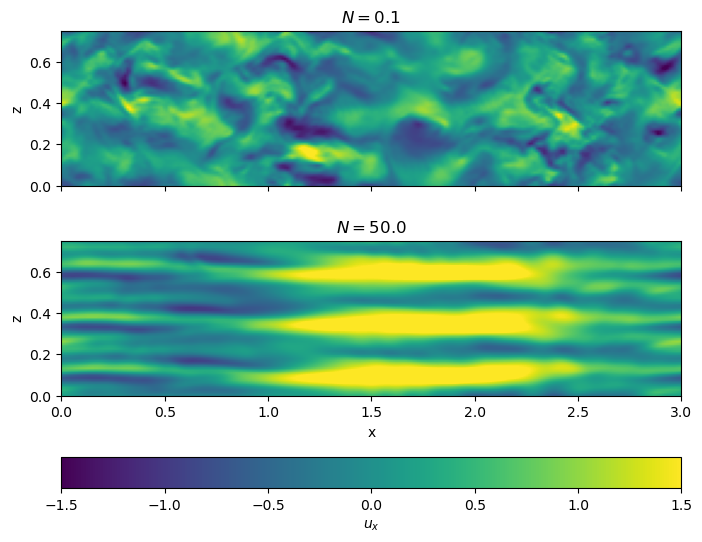

In [11]:
Lx = Ly = 3.0
Lz = Lx / 4
nx = ny = 256
nz = nx / 4

dx = Lx / nx 
dy = Ly / ny 
dz = Lz / nz

folder = 'data/ns3d.strat_256x256x64_V3x3x0.75_N1000_1.0/'
state_phys_pattern = 'state_phys*.nc'
state_phys_list = [sorted(glob.glob(folder + state_phys_pattern))[0]]

for idx, file_path in enumerate(state_phys_list):
    print(file_path)
    with h5py.File(file_path, 'r') as f:
        u1 = f['state_phys/vx'][:]
        

folder = 'data/ns3d.strat_256x256x64_V3x3x0.75_N0001_1.0/'
state_phys_pattern = 'state_phys*.h5'
state_phys_list = [sorted(glob.glob(folder + state_phys_pattern))[0]]

for idx, file_path in enumerate(state_phys_list):
    print(file_path)
    with h5py.File(file_path, 'r') as f:
        u2 = f['state_phys/vx'][:]

extent = [0, Lx, 0, Lz]

fig, axes = plt.subplots(2, 1, figsize=(8, 8), sharex=True, gridspec_kw={"height_ratios": [1, 1]}, facecolor='none')

im1 = axes[0].imshow(u2[:, 0, :], extent=extent, origin="lower", aspect=Lx / Lz, vmin=-1.5, vmax=1.5)
axes[0].set_title("$N=0.1$")
axes[0].set_ylabel("z")
axes[0].set_aspect(1)

im2 = axes[1].imshow(u1[:, 0, :], extent=extent, origin="lower", aspect=Lx / Lz, vmin=-1.5, vmax=1.5)
axes[1].set_title("$N=50.0$")
axes[1].set_xlabel("x")
axes[1].set_ylabel("z")
axes[1].set_aspect(1)

cbar = fig.colorbar(im2, ax=axes[1], orientation="horizontal", pad=0.15)
cbar.set_label("$u_x$")

plt.subplots_adjust(hspace=-0.5) 

plt.show()



<>:38: SyntaxWarning: invalid escape sequence '\e'
<>:42: SyntaxWarning: invalid escape sequence '\e'
<>:38: SyntaxWarning: invalid escape sequence '\e'
<>:42: SyntaxWarning: invalid escape sequence '\e'
/var/folders/np/43rq4vzs0js_3z1xt5mx73hr0000gn/T/ipykernel_22622/1406743220.py:38: SyntaxWarning: invalid escape sequence '\e'
  axes[0].set_title(f'{kmax_str}$\eta = 0.5$')
/var/folders/np/43rq4vzs0js_3z1xt5mx73hr0000gn/T/ipykernel_22622/1406743220.py:42: SyntaxWarning: invalid escape sequence '\e'
  axes[1].set_title(f'{kmax_str}$\eta = 3.0$')


data/ns3d_256x256x64_V3x3x0.75_N0000_0.5/state_phys_t0040.001.h5
data/ns3d_256x256x64_V3x3x0.75_N0000_3.0/state_phys_t0040.001.h5


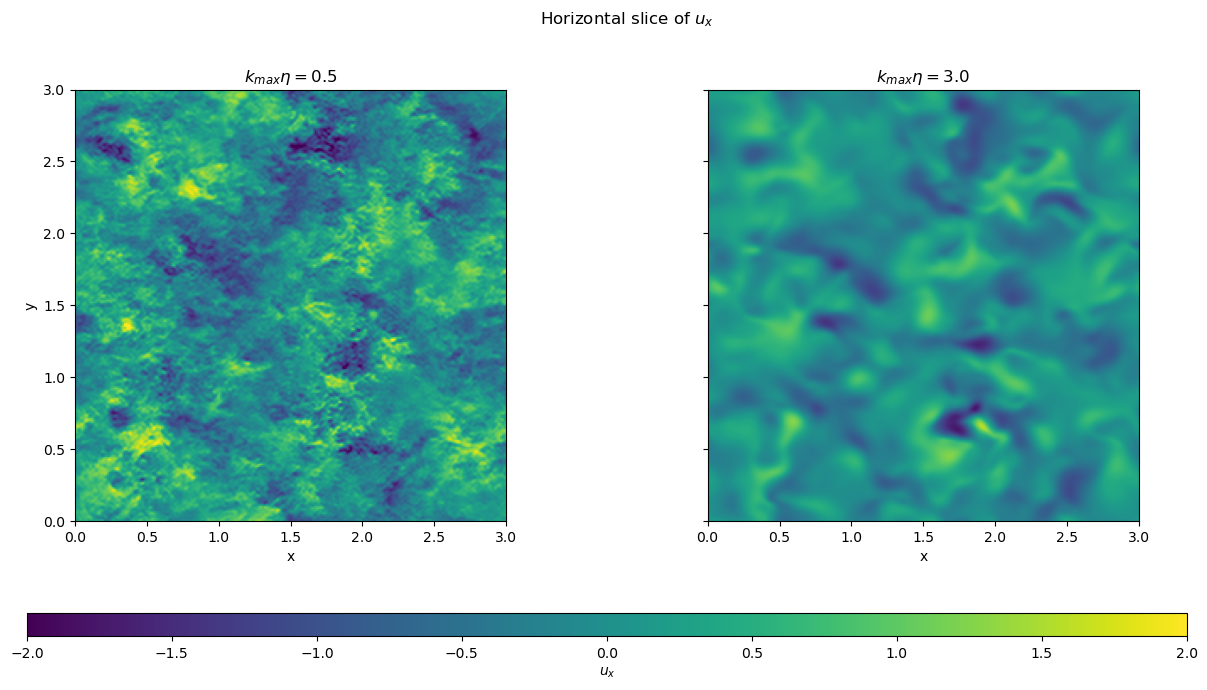

In [8]:
Lx = Ly = 3.0
Lz = Lx / 4
nx = ny = 256
nz = nx / 4

dx = Lx / nx 
dy = Ly / ny 
dz = Lz / nz

folder = 'data/ns3d_256x256x64_V3x3x0.75_N0000_0.5/'
state_phys_pattern = 'state_phys*.h5'
state_phys_list = [sorted(glob.glob(folder + state_phys_pattern))[0]]

for idx, file_path in enumerate(state_phys_list):
    print(file_path)
    with h5py.File(file_path, 'r') as f:
        u1 = f['state_phys/vx'][:]
        
folder = 'data/ns3d_256x256x64_V3x3x0.75_N0000_3.0/'
state_phys_pattern = 'state_phys*.h5'
state_phys_list = [sorted(glob.glob(folder + state_phys_pattern))[0]]

for idx, file_path in enumerate(state_phys_list):
    print(file_path)
    with h5py.File(file_path, 'r') as f:
        u2 = f['state_phys/vx'][:]

extent = [0, Lx, 0, Ly]

kmax_str = r"$k_{max}$"

fig, axes = plt.subplots(1, 2, figsize=(16, 8), sharey=True, facecolor='none')

# Ensure aspect ratio is equal for square plots
im1 = axes[0].imshow(u1[0,:,:], extent=extent, origin='lower', aspect='equal', vmin=-2, vmax=2)
axes[0].set_xlabel('x')
axes[0].set_ylabel('y')
axes[0].set_title(f'{kmax_str}$\eta = 0.5$')

im2 = axes[1].imshow(u2[0,:,:], extent=extent, origin='lower', aspect='equal', vmin=-2, vmax=2)
axes[1].set_xlabel('x')
axes[1].set_title(f'{kmax_str}$\eta = 3.0$')

# Adjust layout to make room for the colorbar
fig.subplots_adjust(right=0.85)  # Adjust if needed

# Place colorbar on the right
cbar = fig.colorbar(im2, ax=axes.ravel().tolist(), location='bottom', aspect=50)
cbar.set_label('$u_x$')

fig.suptitle('Horizontal slice of $u_x$')

plt.show()
